In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data_banknote_authentication/data_banknote_authentication.csv


In [3]:
from sklearn import preprocessing as pre
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
print('done!')

done!


In [ ]:
'''
https://archive.ics.uci.edu/datasets
'''
start_time = time.time()
dataset = shuffle(pd.read_csv('/kaggle/input/data_banknote_authentication/data_banknote_authentication.csv'))
dataset.head()

In [6]:
# mudando nome das colunas que vieram desformatadas
dataset.columns = ['Variance of Wavelet Transformed Image', 'Skewness of Wavelet Transformed Image', 
                   'Curtosis of Wavelet Transformed Image', 'Entropy of Image', 'Class']

# mudando valores da coluna Class para que 1 seja 0 e -1 seja 1
#dataset.loc[dataset['Class'] == 1, 'Class'] = -1
#dataset.loc[dataset['Class'] == 0, 'Class'] = 1

x = dataset[['Variance of Wavelet Transformed Image', 'Skewness of Wavelet Transformed Image', 'Curtosis of Wavelet Transformed Image', 'Entropy of Image']]
y = dataset[['Class']]

dataset.head()

,Variance of Wavelet Transformed Image,Skewness of Wavelet Transformed Image,Curtosis of Wavelet Transformed Image,Entropy of Image,Class
232,0.46901,-0.63321,7.38480,0.36507,-1
268,4.93420,2.41070,-0.17594,1.62450,-1
1131,-3.38840,-8.21500,10.33150,0.98187,-1
858,-5.87300,9.17520,-0.27448,-6.04220,-1
22,0.93584,8.88550,-1.68310,-1.65990,-1


In [7]:
# separando dados
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('done!')

done!


In [ ]:
# normaliza os dados
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

# transforma em array do numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time

print('Time for preprocessing: %f seconds \n' % total_time)
x_train

In [10]:
# hyperbolic tangent activation func
def hyperbolic_tanh(x):
    return (np.exp(x) - np.exp(x)) / (np.exp(x) + np.exp(x))

#hyperbolic derivative
def derivative_hyperbolic(x):
    return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)

print('done!')

done!


In [11]:
# init hyperparameter
print('----- Initializing Hyperparameter -----')
start_time = time.time()

#setting hyperparameter
'''
parametros de treinamento. não explicou por que dos valores, só colocou ali
'''
np.random.seed(10) # original é 10. mudei pra 20 mas não alterou a acuracia
inp = 4 # número de neurônios na camada de entrada # essa variavel está diretamente ligada com a celula abaixo. 
# mudando para cima, da problema na linha `l1 = np.dot(x_train, w1_l1)`
# mudei o random_state do train_test_split para 0 e 1 sem mudar o inp e tudo correu normal, mas a acuracia diminuiu para 55%
hd = 6 # número de neurônios nas camadas ocultas # original do tutorial é 6. mudei para 5 e 4 mas não alterou a acuracia
out = 1 # número de neurônios na camada de saída

actual_out_size = y_train.size
epochs = 5000 # original do tutorial é 10000
eta = 0.001 # taxa de aprendizado # original é 0.001. mudei para 0.002 mas não alterou a acuracia
alpha = 0.5 # parâmetro de regularização # original é 0.7. mudei para 0.5 mas não alterou a acuracia

print('----- Setting 4 weights for hidden levels -----')
'''
pesos iniciais definidos para as camadas ocultas
'''
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)

acc_list =  []

end_time = time.time()
total_time = end_time - start_time

print('Time for setting parameter: %f seconds \n' % total_time)

'''
EXPLICAÇÃO GEMINI - GOOGLE

1. Inicialização de Hiperparâmetros:
A primeira parte do código define e inicializa os hiperparâmetros da rede neural.
A semente aleatória é fixada em 10 (ou 20, conforme sua modificação) para garantir a reprodutibilidade dos resultados.
O número de neurônios na camada de entrada (inp) é definido como 4.
O número de neurônios nas camadas ocultas (hd) é definido como 6 (ou 5 ou 4, conforme sua modificação).
O número de neurônios na camada de saída (out) é definido como 1.
O número de épocas de treinamento (epochs) é definido como 5000 (ou 10000 no tutorial original).
A taxa de aprendizado (eta) é definida como 0.001 (ou 0.002, conforme sua modificação).
O parâmetro de regularização (alpha) é definido como 0.5 (ou 0.7 no tutorial original).

2. Definição dos Pesos Iniciais:
A próxima parte do código define os pesos iniciais para as camadas ocultas da rede neural.
Os pesos são inicializados aleatoriamente usando a função np.random.randn.


--------------------------------------------------------------------------------


1. Número de Neurônios na Camada de Entrada:
Define a dimensionalidade da entrada da rede neural.
Deve ser igual ao número de features do seu conjunto de dados.
Por exemplo, se o seu conjunto de dados possui imagens de 28x28 pixels, a camada de entrada terá 784 neurônios (28 x 28).

2. Número de Neurônios nas Camadas Ocultas:
Define a capacidade da rede neural de aprender relações complexas entre as features.
Mais neurônios permitem que a rede aprenda representações mais complexas, mas também aumentam a complexidade da rede e o risco de overfitting.
O número ideal de neurônios nas camadas ocultas é geralmente encontrado por experimentação.

3. Número de Neurônios na Camada de Saída:
Define o número de classes que a rede neural pode classificar.
Se você tem um problema de classificação binária, a camada de saída terá 1 neurônio.
Se você tem um problema de classificação multiclasse, a camada de saída terá um neurônio para cada classe.

4. Taxa de Aprendizado:
Controla a rapidez com que os pesos da rede neural são atualizados durante o treinamento.
Uma taxa de aprendizado alta faz com que a rede aprenda mais rapidamente, mas também pode levar a instabilidade e overfitting.
Uma taxa de aprendizado baixa faz com que a rede aprenda mais lentamente, mas pode ser mais estável e levar a um melhor desempenho.

5. Parâmetro de Regularização:
Controla a quantidade de regularização aplicada à rede neural.
A regularização ajuda a prevenir overfitting, penalizando pesos grandes.
Um valor alto de regularização pode levar a underfitting, enquanto um valor baixo pode levar a overfitting.
'''

----- Initializing Hyperparameter -----
----- Setting 4 weights for hidden levels -----
Time for setting parameter: 0.001018 seconds 



----- Traning Backpropagation Algorithm -----
Traning accuracy: 0.0 %
Time traning algorithm: 35.637744 seconds 

----- Plotting Accuracy Curve -----


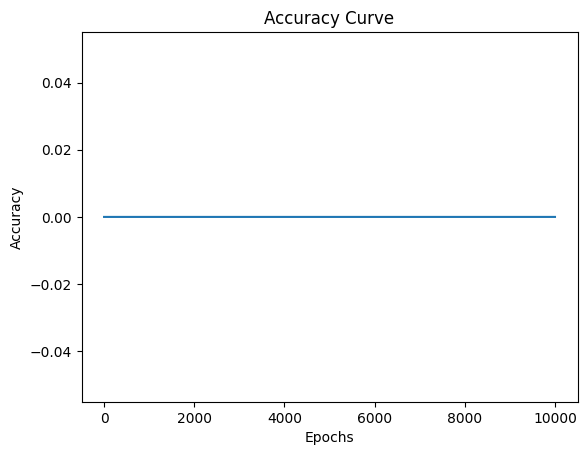

In [12]:
# traning backpropagation algh
print('----- Traning Backpropagation Algorithm -----')
start_time = time.time()

# criterio de parada do Backpropagation é o número de epocas que definimos anteriormente
for i in range(epochs):
    # feedforward for 4 hidden layers by calling activation func
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)
    
    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)
    
    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)
    
    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)
    
    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)
    '''
    o bloco acima olha a saída de cada nivel e peso e repropagando o erro para calcular o 
    peso de cada camada
    '''
    
    #calcula acuracia
    final_out = final_out.round()
    calc_acc = (final_out == y_train).sum()
    acc = calc_acc / actual_out_size
    acc_list.append(acc)
    '''
    o bloco acima calcula o quanto o modelo acertou
    '''
    
    #backpropagation for 4 hidden layers
    final_err = final_out - y_train
    final_signoid_derivative = final_err * derivative_hyperbolic(final_out)
    
    l4_err = np.dot(final_signoid_derivative, out_w.T)
    l4_derivative = l4_err *derivative_hyperbolic(l4_out)
    
    l3_err = np.dot(final_signoid_derivative, out_w.T)
    l3_derivative = l3_err *derivative_hyperbolic(l3_out)
    
    l2_err = np.dot(final_signoid_derivative, out_w.T)
    l2_derivative = l2_err *derivative_hyperbolic(l2_out)
    
    l1_err = np.dot(final_signoid_derivative, out_w.T)
    l1_derivative = l1_err *derivative_hyperbolic(l1_out)
    
    # divide peso do nivel por tamanho da saída
    output_weights = np.dot(l4_out.T, final_signoid_derivative) / actual_out_size
    wheight4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    wheight3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    wheight2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    wheight1 = np.dot(x_train.T, l1_derivative) / actual_out_size
    '''
    divide os pesos por cada saída 
    '''
    
    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * wheight4
    w3_l3 -= eta * alpha * wheight3
    w2_l2 -= eta * alpha * wheight2
    w1_l1 -= eta * alpha * wheight1
    '''
    multiplica os pesos pelas taxas de aprendizado e refaz o processo até que atinja 
    o criterio de parada
    '''

print('Traning accuracy: ' + str(round(acc_list[-1], 2) * 100) + ' %')
end_time = time.time()
total_time = end_time - start_time
print('Time traning algorithm: %f seconds \n' % total_time)

print('----- Plotting Accuracy Curve -----')
plt.title('Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(acc_list)
plt.show()


'''
EXPLICAÇÃO GEMINI - GOOGLE

1. Processo de Propagação (Feedforward):
O código itera por um número definido de épocas (epochs).
Em cada época, ele propaga a entrada (x_train) através da rede neural.
Para cada camada oculta (l1, l2, l3, l4), o código realiza:
Cálculo da saída ponderada usando multiplicação de matriz (np.dot) entre a entrada da camada e os pesos correspondentes (w1_l1, w2_l2, etc.).
Aplicação da função de ativação tangente hiperbólica (hyperbolic_tanh) para introduzir não-linearidade na rede.

2. Cálculo da Precisão:
Após a propagação, o código calcula a precisão do modelo.
Ele compara a saída final arredondada (final_out.round()) com os valores reais de saída (y_train).
A precisão é calculada como a proporção de acertos (acc) em relação ao tamanho total da saída (actual_out_size).
A precisão para cada época é armazenada na lista acc_list.

3. Backpropagation:
O código então implementa o algoritmo de backpropagation para propagar o erro de volta pelas camadas.
Ele calcula o erro final (final_err) como a diferença entre a saída final e os valores reais.
A derivada da função de ativação (derivative_hyperbolic) é usada para calcular a contribuição do erro para cada camada.
O erro é propagado para trás, calculando o erro para cada camada oculta (l1_err, l2_err, etc.).

4. Atualização dos Pesos:
O código atualiza os pesos da rede neural usando a regra de atualização do gradiente descendente com momentum.
Para cada camada, ele calcula o gradiente do erro em relação aos pesos correspondentes (wheight1, wheight2, etc.).
O gradiente é dividido pelo tamanho da saída (actual_out_size) para normalizar a atualização.
Os pesos são atualizados subtraindo o produto da taxa de aprendizado (eta), momento (alpha), e o gradiente.

5. Saída e Plot da Precisão:
Após o treinamento, o código exibe a precisão final arredondada como porcentagem.
Ele também calcula e exibe o tempo gasto no treinamento.
Por fim, o código plota a curva de precisão ao longo das épocas usando a biblioteca matplotlib (plt).

Observações:
O código assume que as funções hyperbolic_tanh e derivative_hyperbolic estão definidas em algum lugar fora deste trecho.
O código usa o momentum (alpha) para acelerar a convergência do treinamento.
Este é um exemplo básico de backpropagation. Redes neurais mais complexas podem usar arquiteturas e técnicas de treinamento diferentes.
'''

In [ ]:
# testing backpropagation algh
print('----- Testing Backpropagation Algorithm -----')
start_time = time.time()

# feedforward for 4 hidden layers by calling activation func
l1_test = np.dot(x_test, w1_l1)
l1_out_test = hyperbolic_tanh(l1_test)

l2_test = np.dot(l1_out_test, w2_l2)
l2_out_test = hyperbolic_tanh(l2_test)

l3_test = np.dot(l2_out_test, w3_l3)
l3_out_test = hyperbolic_tanh(l3_test)

l4_test = np.dot(l3_out_test, w4_l4)
l4_out_test = hyperbolic_tanh(l4_test)

output_test = np.dot(l4_out_test, out_w)
final_out_test = hyperbolic_tanh(output_test)
'''
o bloco acima olha a saída de cada nivel e peso e repropagando o erro para calcular o 
peso de cada camada
'''

#calcula acuracia
actual_out_size = y_test.size
final_out_test_acc = final_out_test.round()
calc_acc = (final_out_test_acc == y_test).sum()
acc_test = (calc_acc / actual_out_size) * 100
'''
o bloco acima calcula o quanto o modelo acertou
'''

print('Testing accuracy: ' + str(round(acc_test, 2)) + ' %')
end_time = time.time()
total_time = end_time - start_time
print('Time testing algorithm: %f seconds \n' % total_time)

#print(final_out_test)

In [1]:
'''
Resultados encontrados aq foram diferentes dos que foram apresentados na aula da Faculade Desconplica
'''

'\nResultados encontrados aq foram diferentes dos que foram apresentados na aula da Faculade Desconplica\n'